In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent.parent

sys.path.append(str(ROOT_DIR))
print("Ruta añadida al sys.path:", ROOT_DIR)

Ruta añadida al sys.path: c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Similares


In [2]:
# Obtener la ruta de los datos
from src.data.load_data import load_data, codificar_variables
from src.config import DATA_PATH_BANK

In [3]:
DATA_PATH_ = ROOT_DIR / DATA_PATH_BANK
df = load_data(DATA_PATH_)

# Estructura 
print("🔍 Dimensiones:", df.shape)
print("\n🧱 Tipos de datos:\n", df.dtypes)

# Primeras filas
print("\n👀 Primeras filas:")
display(df.head())

# Revisión de nulos
print("\n🚨 Nulos por columna:\n", df.isnull().sum())

# Duplicados
print("\n📎 Registros duplicados:", df.duplicated().sum())

🔍 Dimensiones: (4521, 17)

🧱 Tipos de datos:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

👀 Primeras filas:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no



🚨 Nulos por columna:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

📎 Registros duplicados: 0


In [6]:
# Valores únicos por columna
print("\n🔢 Valores únicos por columna:")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()} valores únicos")


🔢 Valores únicos por columna:
- age: 67 valores únicos
- job: 12 valores únicos
- marital: 3 valores únicos
- education: 4 valores únicos
- default: 2 valores únicos
- balance: 2353 valores únicos
- housing: 2 valores únicos
- loan: 2 valores únicos
- contact: 3 valores únicos
- day: 31 valores únicos
- month: 12 valores únicos
- duration: 875 valores únicos
- campaign: 32 valores únicos
- pdays: 292 valores únicos
- previous: 24 valores únicos
- poutcome: 4 valores únicos
- y: 2 valores únicos


In [7]:
num_cols = df.select_dtypes(include="number").columns

print("\n📊 Estadísticas de variables numéricas:")
display(df[num_cols].describe().T)



📊 Estadísticas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


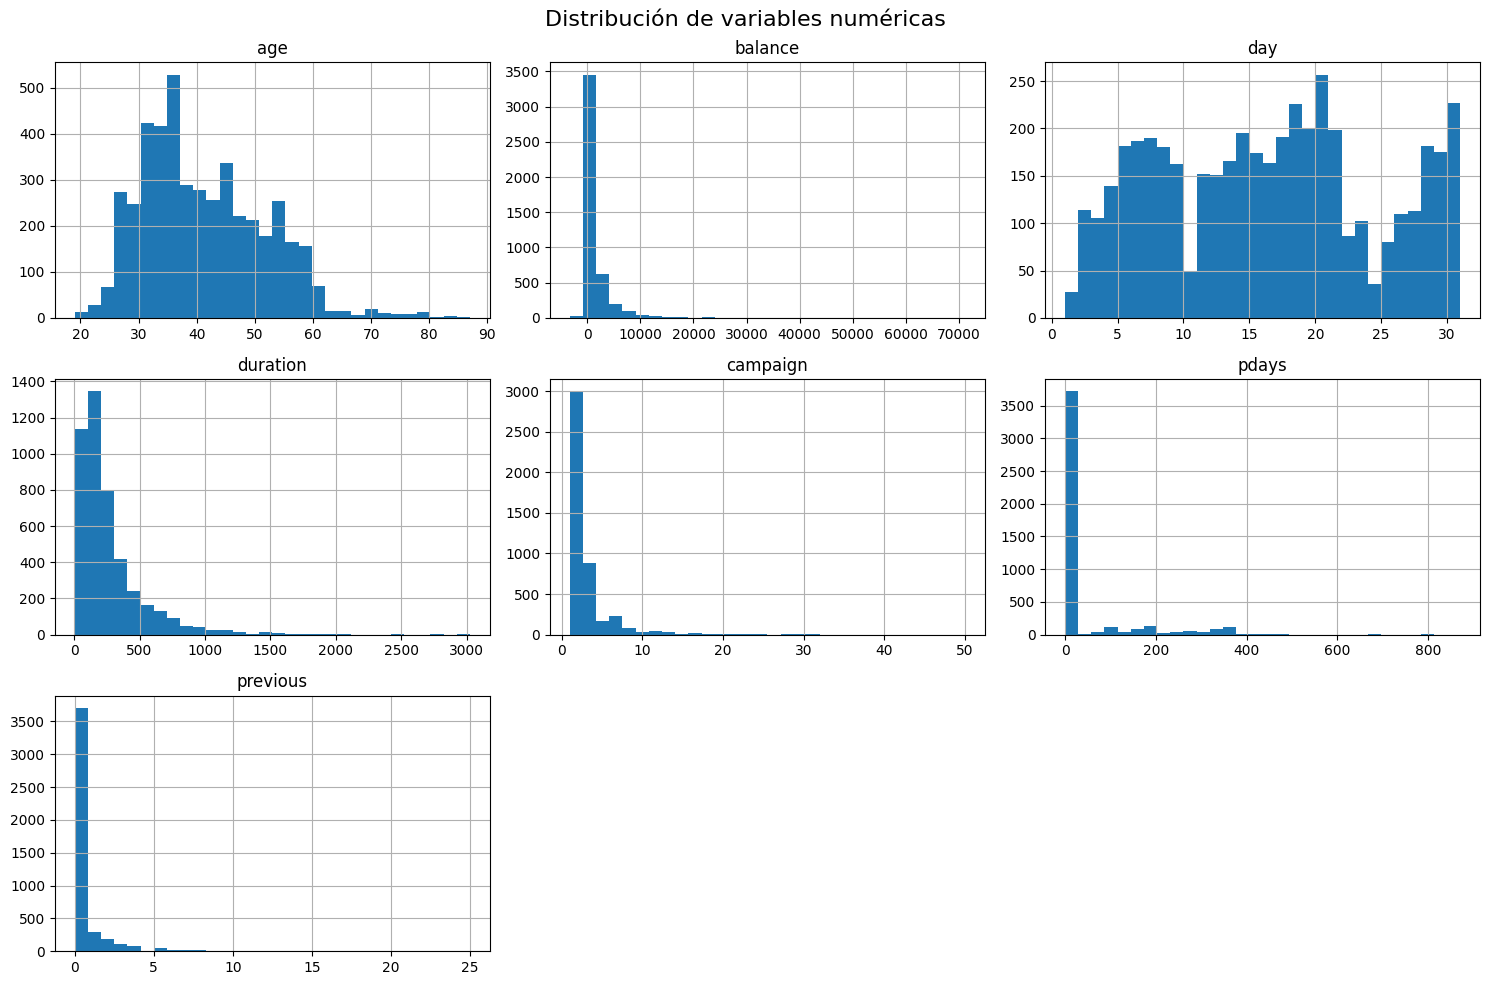

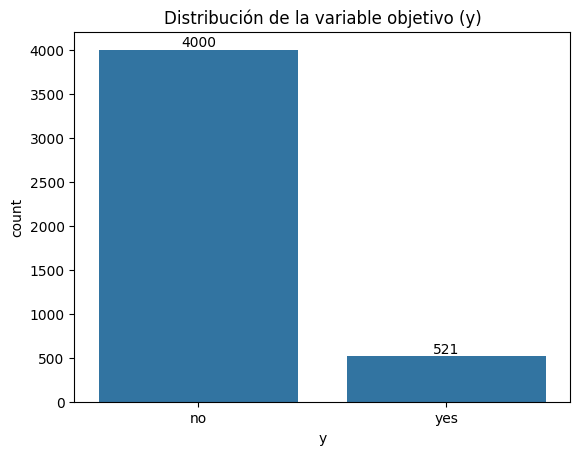

In [8]:
# Histograma de numéricas
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# Conteo de la variable objetivo
ax = sns.countplot(data=df, x='y')
plt.title("Distribución de la variable objetivo (y)")
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',                # El texto que se muestra
                (p.get_x() + p.get_width() / 2., count),  # Posición (centro de la barra, altura)
                ha='center', va='bottom',   # Alineación horizontal y vertical
                fontsize=10, color='black')

plt.show()


In [9]:
# Detectar columnas categóricas
cat_cols = df.select_dtypes(include="object").columns

# Mostrar el conteo absoluto y relativo por cada categoría
for col in cat_cols:
    print(f"\n📌 {col.upper()} - {df[col].nunique()} categorías únicas")
    print("Conteo absoluto:")
    print(df[col].value_counts())
    print("\nPorcentaje relativo (%):")
    print((df[col].value_counts(normalize=True) * 100).round(2))



📌 JOB - 12 categorías únicas
Conteo absoluto:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

Porcentaje relativo (%):
job
management       21.43
blue-collar      20.92
technician       16.99
admin.           10.57
services          9.22
retired           5.09
self-employed     4.05
entrepreneur      3.72
unemployed        2.83
housemaid         2.48
student           1.86
unknown           0.84
Name: proportion, dtype: float64

📌 MARITAL - 3 categorías únicas
Conteo absoluto:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

Porcentaje relativo (%):
marital
married     61.87
single      26.45
divorced    11.68
Name: proportion, dtype: float64

📌 EDUCATION - 4 categorías únicas
Conteo absoluto:
education
secondary    2

In [10]:
df_encoded = codificar_variables(df)

In [12]:
df_encoded.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,0,1787,0,0,19,10,79,1,...,0,1,0,1,0,0,0,0,0,1
1,33,1,0,4789,1,1,11,5,220,1,...,0,0,0,1,0,0,0,0,0,0
2,35,2,0,1350,1,0,16,4,185,1,...,0,0,0,0,1,0,0,0,0,0
3,30,2,0,1476,1,1,3,6,199,4,...,0,0,0,1,0,0,1,0,0,1
4,59,1,0,0,1,0,5,5,226,1,...,0,0,0,1,0,0,1,0,0,1


In [14]:
print("\n🧱 Tipos de datos:\n", df_encoded.dtypes)



🧱 Tipos de datos:
 age                  int64
education            int64
default              int64
balance              int64
housing              int64
loan                 int64
day                  int64
month                int64
duration             int64
campaign             int64
pdays                int64
previous             int64
y                    int64
job_blue-collar      int64
job_entrepreneur     int64
job_housemaid        int64
job_management       int64
job_retired          int64
job_self-employed    int64
job_services         int64
job_student          int64
job_technician       int64
job_unemployed       int64
job_unknown          int64
marital_married      int64
marital_single       int64
contact_telephone    int64
contact_unknown      int64
poutcome_other       int64
poutcome_success     int64
poutcome_unknown     int64
dtype: object
